## FINAL PROJECT SUBMISSION


* Student name: Samuel Njogu Mathenge
* Student pace: full time
* Scheduled project review date/time: 5/8/2025
* Instructor name: Asha Deen
* Blog post URL: https://github.com/SamuelMathenge/PHASE-2-PROJECT.git

# **BUSINESS UNDERSTANDING**
The movie market is one of the industries which have been there for a long time, it is mostly used for entertainment and educational purposes. The main source of income for movie studios is from the sales of a movie,both locally and globally. The company wishes to venture into this industry by setting up a studio. To do this there are alot of considerations, the main one being viewer satisfaction and that is by being considerate of the genre,movie runtime among others that would satisfy the users experience. The movie Industry is growing and to get a share of the market you need to have a large number of audience. This is what the analysis is all about, getting Customer Insights which will help me make recommendations which are data driven. To understand the movie industry well I put into consideration three question.


*   Does the movie runtime have any influence on the movie rating?

 - At this point I want to explore the likelihood of a movie getting a higher rating maybe because the runtime is not too long or the vice versa.


*   Does the popularity of a studio determine the income of the studio in question?
 - In the industry there are both popular and not so popular studio, I want to look into them and try to find out if the most popular studios attract higher incomws.


*   What is the effect of movie budgeting to it's sales?
 - Some movies have a very high production budget while others have a lower budget. In my analysis I want to find out the outcomes of both instances, where the movie budgeting is low and where the movie budgeting is high.







# **DATA UNDERSTANDING**
# The data being used is from various movie rating sites. For this analysis I have used three datasets.  

*   One of the datasets,bom movie dataset represents various studios,their domestic income and the years. It's source is https://www.boxofficemojo.com/.


*   The other dataset the IMDB dataset from https://www.imdb.com/ and contains columns such as movie ratings, runtime and genre which are essential for the analysis.


*    The third dataset is TN MOVIE which has been sourced from https://www.themoviedb.org/ and it contains mostly columns which help in quantifying the gross generated by various movies and the years.






In [36]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sqlite3

#accessing the datasets
bom_movie = pd.read_csv('bom.movie_gross.csv')
tn_movie = pd.read_csv('tn.movie_budgets.csv')


#Accessing the databse using sql queries
#creating a connection
connection = sqlite3.connect('im.db')

#accessing the available tables in our database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';",connection)

Viewing the first 5 rows of the BOM MOVIE DATASET

In [37]:
bom_movie.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Viewing the first 5 rows of the TN MOVIE DATASET

In [38]:
tn_movie.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Since IMDB is a database we explore some of the Tables in the database

In [39]:
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Choosing the tables to use, in my case I have choosen movie_basics, movie_akas and movie_ratings

In [40]:
#Quering  all the rows from the movie_basics table
df2 = pd.read_sql_query("SELECT * FROM movie_basics",connection)
df2.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [41]:
#Quering  all the rows from the movie_akas table
df3 = pd.read_sql_query("SELECT * FROM movie_akas",connection)
df3.head(5)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [42]:
#Quering  all the rows from the movie_akas table
df4 = pd.read_sql_query("SELECT * FROM movie_ratings",connection)
df4.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Used an inner loop to connect the three tables because am concerned with the rows which contain matching entrie for a better analysis.

In [43]:
#used inner to only include entries that are in all tables
df5 = pd.read_sql_query("""
    SELECT *
    FROM
        movie_basics AS mb
    INNER JOIN
        movie_akas AS ma ON ma.movie_id=mb.movie_id
    INNER JOIN
        movie_ratings AS mr ON mb.movie_id=mr.movie_id

    """,connection)
imdb = df5

Viewing the dataset after the join

In [44]:
imdb.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,ordering,title,region,language,types,attributes,is_original_title,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,1,Sangharsh,IN,hi,None,alternative transliteration,0.0,tt0063540,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,2,Sunghursh,None,None,original,None,1.0,tt0063540,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,3,Sunghursh,IN,None,None,None,0.0,tt0063540,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,4,Sunghursh,IN,hi,None,alternative transliteration,0.0,tt0063540,7.0,77
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,5,Sungharsh,IN,hi,None,alternative spelling,0.0,tt0063540,7.0,77


FUNCTION TO CHECK THE ATTRIBUTES OF ALL THREE TABLES AT ONCE

In [45]:
#function to check for common attributes for the three datasets
#here we define two parameters where df is for the dataset name and name is for the description
def dataset_description(df, dataset_name):
    print(f"{dataset_name}")
    print("Dataset Shape:", df.shape)
    print("Dataset Columns:", df.columns)
    print("Dataset Datatypes", df.dtypes)

    print("Dataset Basic Statistics", df.describe())
    print("Dataset missing value", df.isnull().sum())



In [46]:
#Calling on the function for each of our available dataset
dataset_description(bom_movie, 'BOM DATASET')
dataset_description(imdb, 'IMDB MOVIES')
dataset_description(tn_movie, 'TN MOVIES')


BOM DATASET
Dataset Shape: (3387, 5)
Dataset Columns: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Dataset Datatypes title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
Dataset Basic Statistics        domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000
Dataset missing value title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
IMDB MOVIES
Dataset Shape: (261806, 17)
Dataset Columns: Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'ordering', 'title', 'region',
    

In [47]:
#Function to check for duplicates in all datasets
def duplicates_check(df, dataset_name):
    print(f"The number of duplicates in {dataset_name} is ",df.duplicated().value_counts())

In [48]:
duplicates_check(bom_movie, 'BOM DATASET')
duplicates_check(imdb, 'TN MOVIES')
duplicates_check(tn_movie, 'TN MOVIES')

The number of duplicates in BOM DATASET is  False    3387
Name: count, dtype: int64
The number of duplicates in TN MOVIES is  False    261806
Name: count, dtype: int64
The number of duplicates in TN MOVIES is  False    5782
Name: count, dtype: int64


# **DATA PREPARATION**

BOM MOVIE DATASET

In [49]:
#selecting the relevant columns from the BOM dataset
bom_movie = bom_movie[[
    #'title',
    'studio',
    'domestic_gross',
    #'foreign_gross',
    'year'
]]
#dropping all rows with missing  values
bom_movie[bom_movie[['studio','domestic_gross']].isna().any(axis=1)]
bom_movie.dropna(subset=['studio','domestic_gross'],inplace=True)

From the attributes for BOM dataset I noticed that the foreign gross column contained many missing values, about 50% and since I have another dataset that has a similar column I decided to drop the column in the BOM dataset as it won't affect my analysis.

In [50]:
#Dropping all the rows with missing data
bom_movie.isnull().sum()

studio            0
domestic_gross    0
year              0
dtype: int64

TN MOVIE DATASET


The tn movie dataset does not have missing values, however the production_budget, domestic_gross and worldwide_gross columns were of type object. This means that we can't do any numeric calculation on this columns so the first step is to convert this rows into a numeric type.

In [51]:
#Function for converting the object columns to numerical for purposes of calculations
def to_numeric(df,column_name):
    #getting rid of the dollar sign
    df[column_name] = df[column_name].str.replace('$','',regex = False)
    #getting rid of the comma
    df[column_name] = df[column_name].str.replace(',','',regex = False)
    #converting into numeric
    df[column_name] = pd.to_numeric(df[column_name])


In [52]:
#calling the convert function
to_numeric(tn_movie,'production_budget')
to_numeric(tn_movie,'domestic_gross')
to_numeric(tn_movie,'worldwide_gross')

In [53]:
#Viewing the first 5 rows after the conversion
tn_movie.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


IMDB MOVIE DATASET

Dropping the columns I don't need for my analysis and retaining the columns which are significant for the analysis. Dropping the  rows which also contain missing values. For this analysis it was earsier to drop the rows as it wouldn't affect the analysis.


In [54]:
imdb = imdb[['movie_id',
             'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres',
             #'movie_id',
             'ordering', 'title', 'region',
       #'language', 'types', 'attributes',
             #'is_original_title',
             #'movie_id',
       'averagerating', 'numvotes']]
imdb[imdb[['region','runtime_minutes','genres']].isna().any(axis=1)]
imdb.dropna(subset=['region','runtime_minutes','genres'],inplace=True)

C:\Users\sam\AppData\Local\Temp\ipykernel_29820\455507930.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb.dropna(subset=['region','runtime_minutes','genres'],inplace=True)


In [55]:
imdb.isnull().sum()

movie_id           0
movie_id           0
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
ordering           0
title              0
region             0
averagerating      0
numvotes           0
dtype: int64

SAVING THE CLEANED DATASETS TO LOCAL STORAGE

In [56]:
imdb.to_csv('C:\\Users\\sam\\Desktop\\clean_IMDB.csv', index=False)
tn_movie.to_csv('C:\\Users\\sam\\Desktop\\clean_TN_MOVIE.csv', index=False)
bom_movie.to_csv('C:\\Users\\sam\\Desktop\\clean_BOM_MOVIE.csv', index=False)

# **DATA ANALYSIS AND VISUALIZATIONS**

**BAR GRAPH**

This bar graph helps us identify the most common studios based on the number of movies they have produced. The visualization doesn't really answer any question apart from showing the common studiios but in the next visualization , we try to find out if this common studio appear in the top earning studios.

<Figure size 1200x800 with 0 Axes>

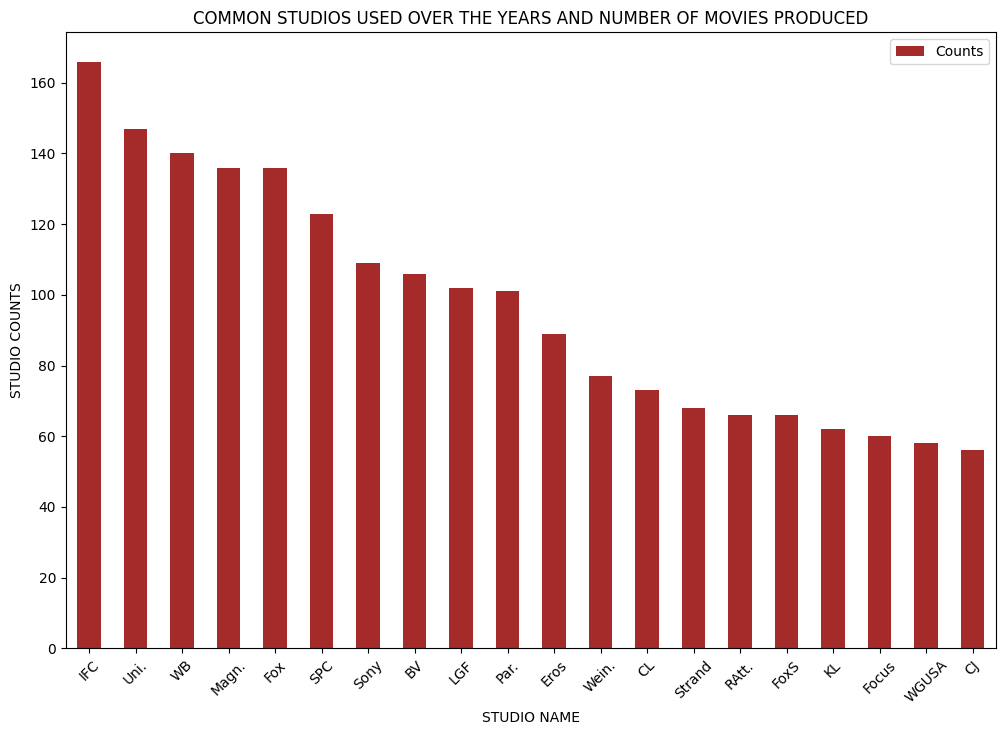

In [57]:
#Grouping  the most common studios
common_studios = bom_movie['studio'].value_counts().reset_index()
common_studios.columns = ['studio', 'Counts']
#plotting the bar graph
#top ten most common studios
plt.figure(figsize=(12,8))
common_studios.head(20).plot(kind='bar', x='studio', y='Counts', figsize=(12,8), legend=True,color='brown')
plt.title('COMMON STUDIOS USED OVER THE YEARS AND NUMBER OF MOVIES PRODUCED')
plt.xlabel('STUDIO NAME')
plt.ylabel('STUDIO COUNTS')

plt.xticks(rotation=45)
plt.show()

BAR GRAPH FOR TOP EARNING STUDIOS FROM THE DOMESTIC GROSS


First I grouped by studio so that all the gross from a particular movie studio is added together. I then sort the values so the studios with highest gross start. Refering back to my previous visualization it's evident that popular studios have the highest domestic gross.

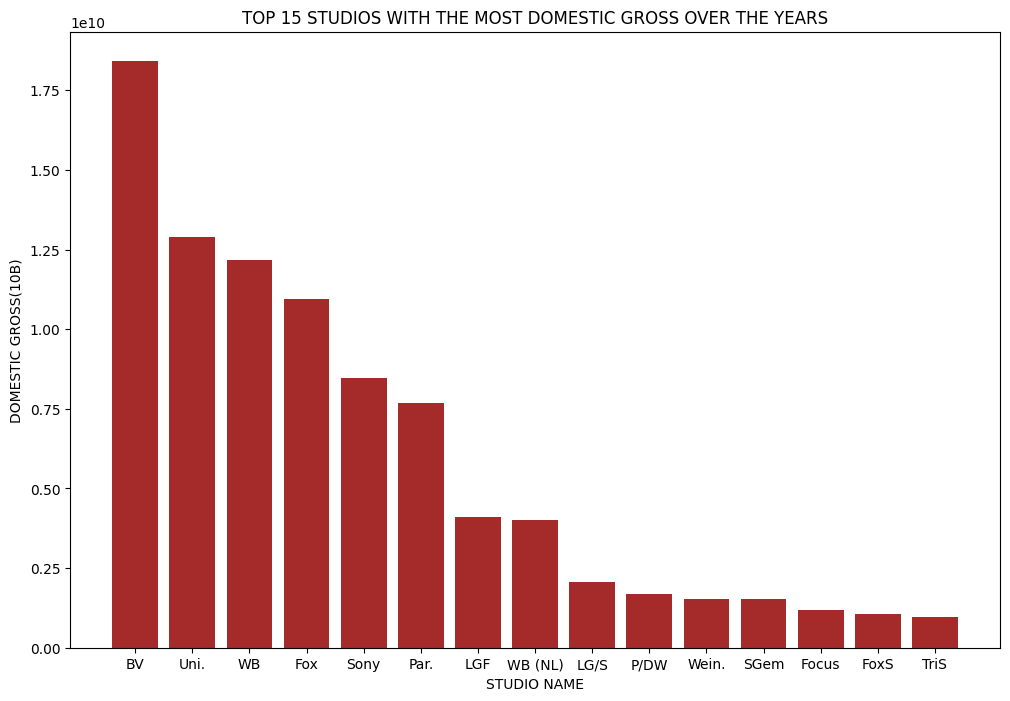

In [58]:
#grouping by studio name and getting the total gross
Income_per_studio = bom_movie.groupby('studio')['domestic_gross'].sum().reset_index()
#sorting from highest
Income_per_studio = Income_per_studio.sort_values(by='domestic_gross', ascending=False).head(15)
#Plotting the bar graph
plt.figure(figsize=(12,8))
plt.bar(Income_per_studio['studio'], Income_per_studio['domestic_gross'],color='brown')

plt.title('TOP 15 STUDIOS WITH THE MOST DOMESTIC GROSS OVER THE YEARS')
plt.xlabel('STUDIO NAME')
plt.ylabel('DOMESTIC GROSS(10B)')


plt.show()

LINE PLOT FOR THE DISTRIBUTION OF GROSS OVER THE YEARS

The analytical significance of the plot is that it helps us understand the trend of the income over the years. It helps us evaluate whether the gross has been increasing over the years or not.

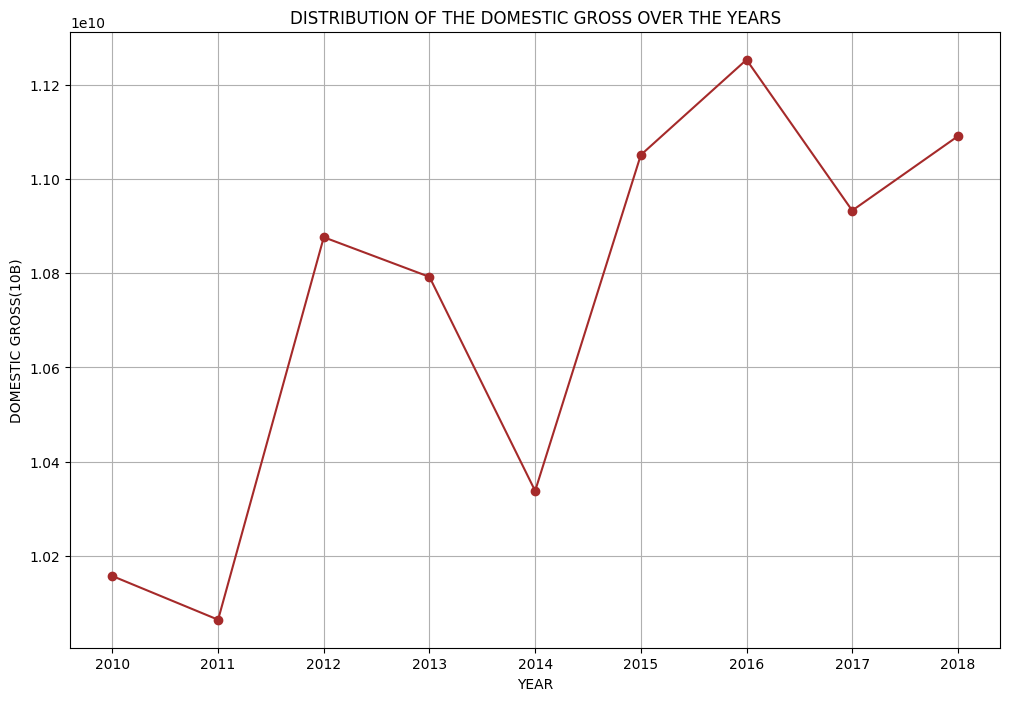

In [59]:
#grouping the gross by year and adding all the gross of that particular year
Income_per_year = bom_movie.groupby('year')['domestic_gross'].sum().reset_index()

#Plotting
plt.figure(figsize=(12,8))
plt.plot(Income_per_year['year'], Income_per_year['domestic_gross'], marker='o',color='brown')


plt.title('DISTRIBUTION OF THE DOMESTIC GROSS OVER THE YEARS')
plt.xlabel('YEAR')
plt.ylabel('DOMESTIC GROSS(10B)')
plt.grid(True)
plt.show()


TN MOVIE

TN MOVIE dataset has a column release_date which has a format that limits us from plotting well. First we convert it to datetime and create a new column in the dataset to hold the converted year.




In [60]:
#converting release time to date time by year
tn_movie['release_date'] = pd.to_datetime(tn_movie['release_date'])

#creating a new column to hold the years
tn_movie['Year'] = tn_movie['release_date'].dt.year

The dataset also contains data from as far back as 1915 so the best thing would be to bin the years.

In [61]:
#binning the years
tn_movie['Year'] = pd.cut(tn_movie['Year'],
                          bins=[1915,1930,1945,1960,1975,1990,2005,2020],
                          labels = ['1915-1930','1930-1945','1945-1960','1960-1975','1975-1990','1990-2005','2005-2020'])


GROUPED BAR GRAPH FRO HIGH BUDGETED MOVIES AND THEIR INCOMES

The idea of using a grouped bar graph is so that I could get a more clear comparison. The first bar being the production budget followed by domestic and worldwide gross. With this grouped bar graph I took the top 15 most budget for movies.

C:\Users\sam\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sam\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


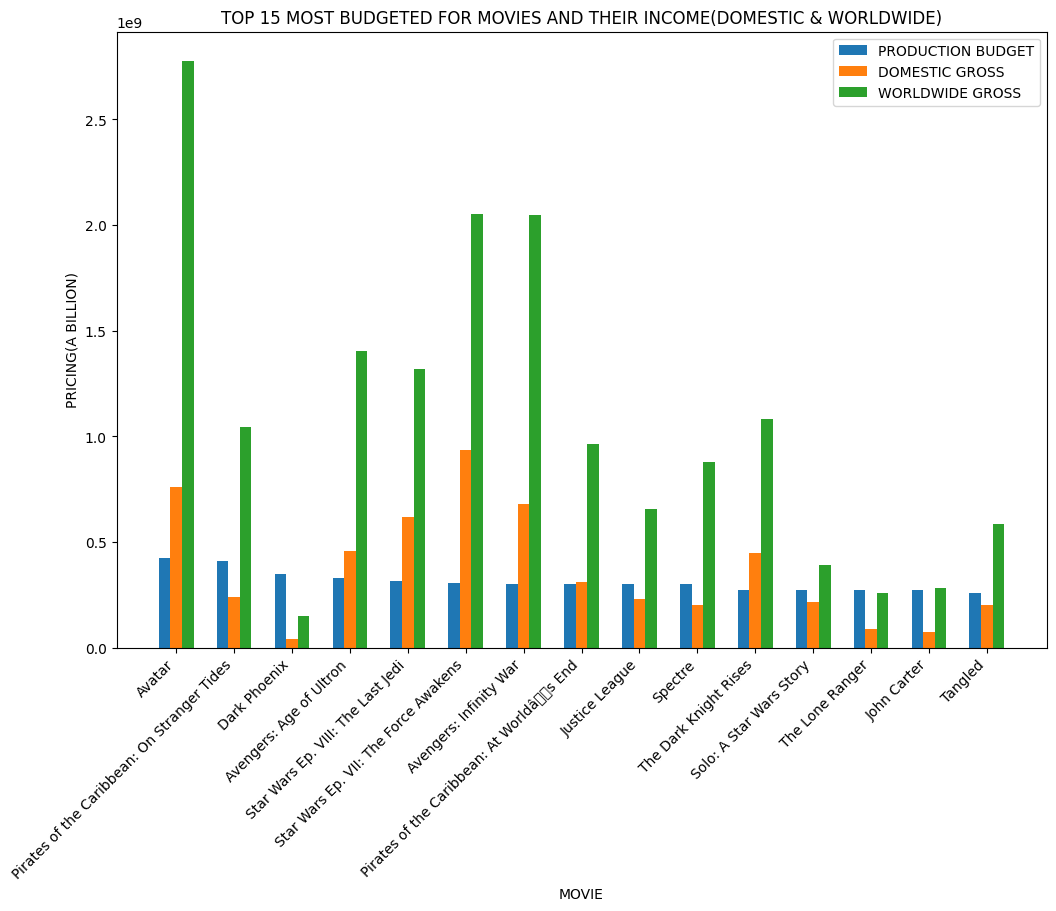

In [62]:
#Sorting movies by the most budgeted for and taking the first 15
top_budgeted_movies = tn_movie.sort_values(by = 'production_budget', ascending = False)
top_budgeted_movies = top_budgeted_movies.head(15)
plt.figure(figsize=(12,8))
w = 0.2

#Setting the number of bins for each bar graph
bar1 = np.arange(len(top_budgeted_movies['movie']))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

#plotting the bar graphs
plt.bar(bar1,top_budgeted_movies['production_budget'],w,label="PRODUCTION BUDGET")
plt.bar(bar2,top_budgeted_movies['domestic_gross'],w,label="DOMESTIC GROSS")
plt.bar(bar3,top_budgeted_movies['worldwide_gross'],w,label="WORLDWIDE GROSS")

plt.xlabel('MOVIE')
plt.ylabel('PRICING(A BILLION)')
plt.title('TOP 15 MOST BUDGETED FOR MOVIES AND THEIR INCOME(DOMESTIC & WORLDWIDE)')
plt.legend()
plt.xticks(bar1+w,top_budgeted_movies['movie'],rotation=45,  ha='right')
plt.show()

GROUPED BAR GRAPH FOR LOW BUDGETED MOVIES AND THEIR INCOMES

With this grouped bar graph for low budgeted movies I decided to use latest data so I used data from 2000 to date.

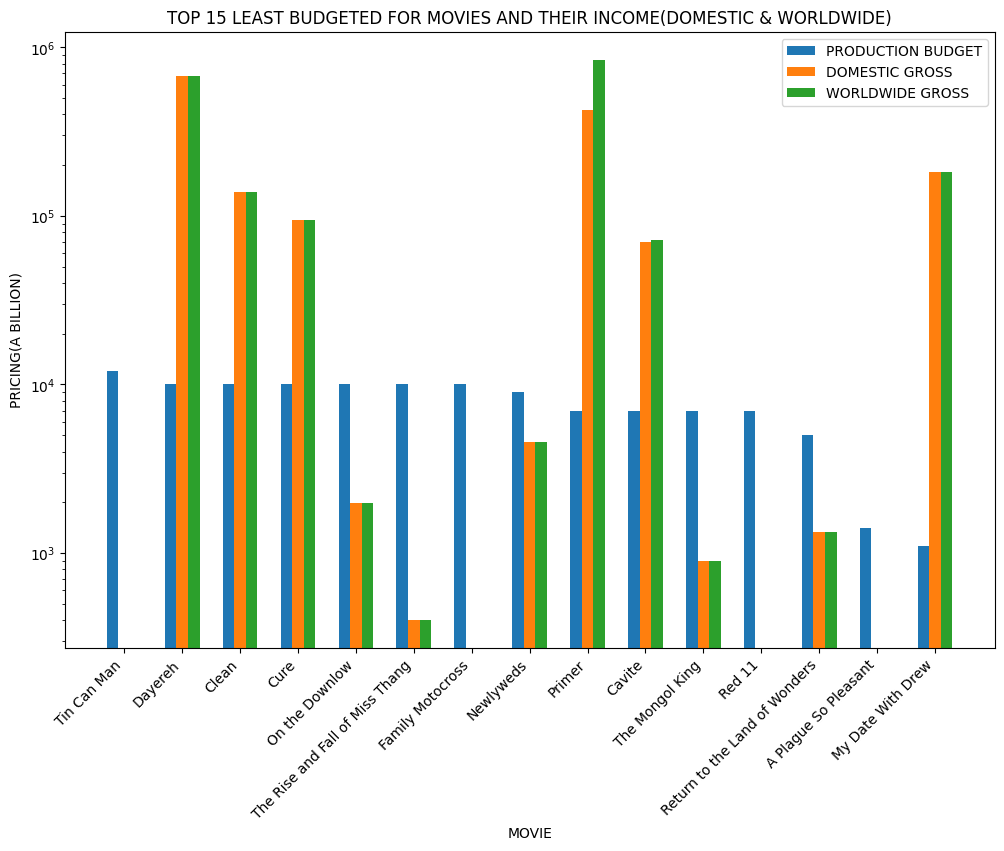

In [63]:
#converting to years
tn_movie['release_date'] = pd.to_datetime(tn_movie['release_date'])
tn_movie['INDIVIDUAL_YEAR'] = tn_movie['release_date'].dt.year

#sorting from the lowest to highest and choosing from year 2000
least_budgeted_movies = tn_movie.sort_values(by = 'production_budget', ascending = False)
least_budgeted_movies = least_budgeted_movies[least_budgeted_movies['INDIVIDUAL_YEAR']>2000].tail(15)

#plotting
plt.figure(figsize=(12,8))
w = 0.2

first_bar = np.arange(len(least_budgeted_movies['production_budget']))
second_bar = [x+w for x in first_bar]
third_bar = [x+w for x in second_bar]

plt.bar(first_bar,least_budgeted_movies['production_budget'],w,label="PRODUCTION BUDGET",log=True)
plt.bar(second_bar,least_budgeted_movies['domestic_gross'],w,label="DOMESTIC GROSS",log=True)
plt.bar(third_bar,least_budgeted_movies['worldwide_gross'],w,label="WORLDWIDE GROSS",log=True)

plt.xlabel('MOVIE')
plt.ylabel('PRICING(A BILLION)')
plt.title('TOP 15 LEAST BUDGETED FOR MOVIES AND THEIR INCOME(DOMESTIC & WORLDWIDE)')
plt.legend()
plt.xticks(bar1+w,least_budgeted_movies['movie'],rotation=45,  ha='right')
plt.show()

PLOT FOR COMPARING THE INCOMES  OF MOVIES IN DOMESTIC AND WORLWODE MARKETS

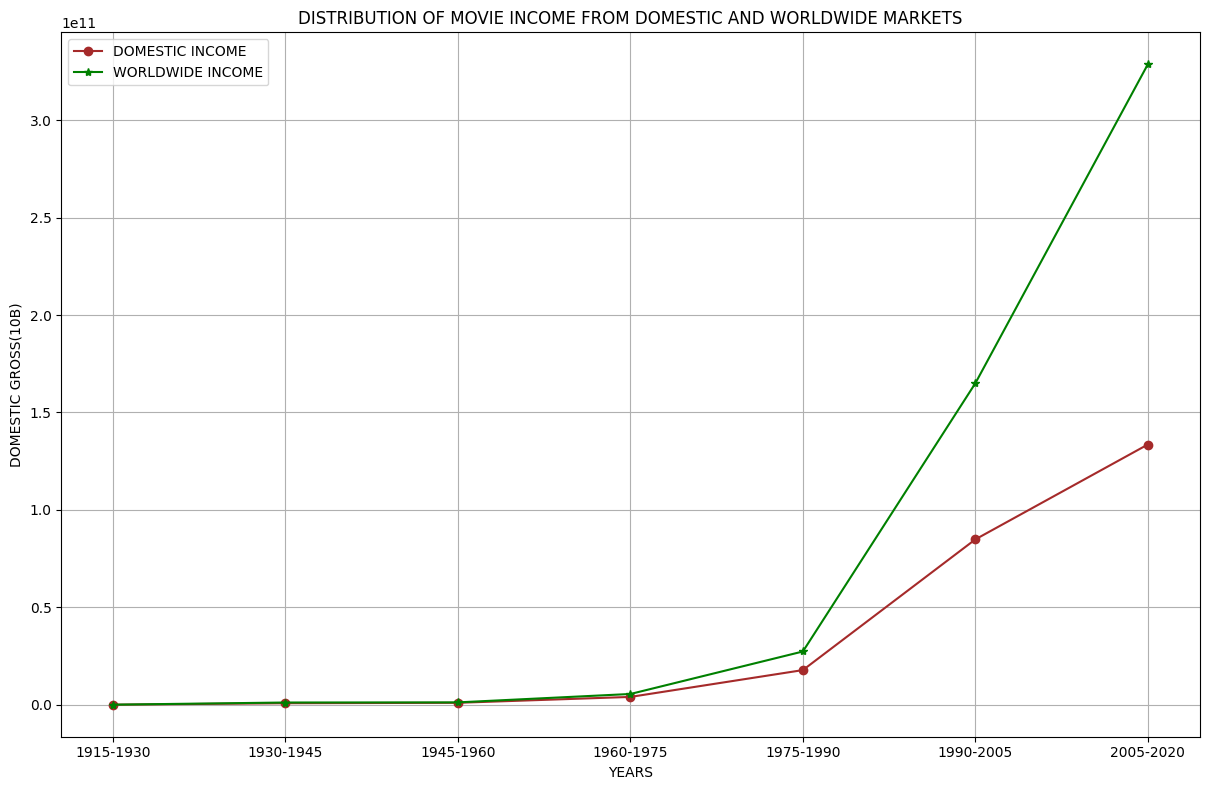

In [64]:
#grouping by the binned years and gettings both domestic and worldwide gross for the binned years
performing_years_domestic = tn_movie.groupby('Year',observed=False)['domestic_gross'].sum().reset_index()
performing_years_worldwide = tn_movie.groupby('Year',observed=False)['worldwide_gross'].sum().reset_index()

#plotting
plt.figure(figsize=(12,8))
plt.plot(performing_years_domestic['Year'], performing_years_domestic['domestic_gross'], marker='o',color='brown',label= "DOMESTIC INCOME")
plt.plot(performing_years_worldwide['Year'], performing_years_worldwide['worldwide_gross'], marker='*',color='green',label= "WORLDWIDE INCOME")

plt.title('DISTRIBUTION OF MOVIE INCOME FROM DOMESTIC AND WORLDWIDE MARKETS')
plt.xlabel('YEARS')
plt.tight_layout()
plt.legend()
plt.ylabel('DOMESTIC GROSS(10B)')
plt.grid(True)
plt.show()

IMDB DATASET

A look at the first 5 rows and the last 5 rows of the imdb dataset and something is quite clear. Some movie_id appear several times, this is not an error from the inner join rather the results are because in the movie_akas table each movie id was linked to different alias(nicknames) used in different regions and also a column ordering which differentiates the movies. Though the table is significant I can't use it as it is as i.e if I decide to get the average rating of all movies the result would be biased as some movies appear many times yet the rating is the same only difference is the movie nicknames.

In [65]:
imdb.head()

,movie_id,movie_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,averagerating,numvotes
0,tt0063540,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,7.0,77
2,tt0063540,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,Sunghursh,IN,7.0,77
3,tt0063540,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4,Sunghursh,IN,7.0,77
4,tt0063540,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5,Sungharsh,IN,7.0,77
5,tt0066787,tt0066787,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",1,One Day Before the Rainy Season,XWW,7.2,43


DROPPING THE DUPLICATES ROWS USING  THE MOVIE ID

In [66]:
imdb = imdb.drop_duplicates(subset=['movie_id'])
imdb

,movie_id,movie_id,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,averagerating,numvotes
0,tt0063540,tt0063540,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,7.0,77
5,tt0066787,tt0066787,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",1,One Day Before the Rainy Season,XWW,7.2,43
9,tt0069049,tt0069049,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,1,O Outro Lado do Vento,BR,6.9,4517
26,tt0100275,tt0100275,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",2,The Wandering Soap Opera,XWW,6.5,119
31,tt0137204,tt0137204,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",1,Joe Finds Grace,CA,8.1,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261792,tt9899860,tt9899860,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.0,"Drama,Thriller",1,Watching This Movie Is a Crime,XWW,8.1,7
261796,tt9899880,tt9899880,tt9899880,Columbus,Columbus,2018,85.0,Comedy,2,Colombos,IR,5.8,5
261797,tt9903952,tt9903952,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",1,BADMEN with a good behavior,DE,9.2,5
261801,tt9905462,tt9905462,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,2,Sisterleaf,IN,8.4,600


BAR GRAPH TO SHOW THE MOST COMMON GENRES

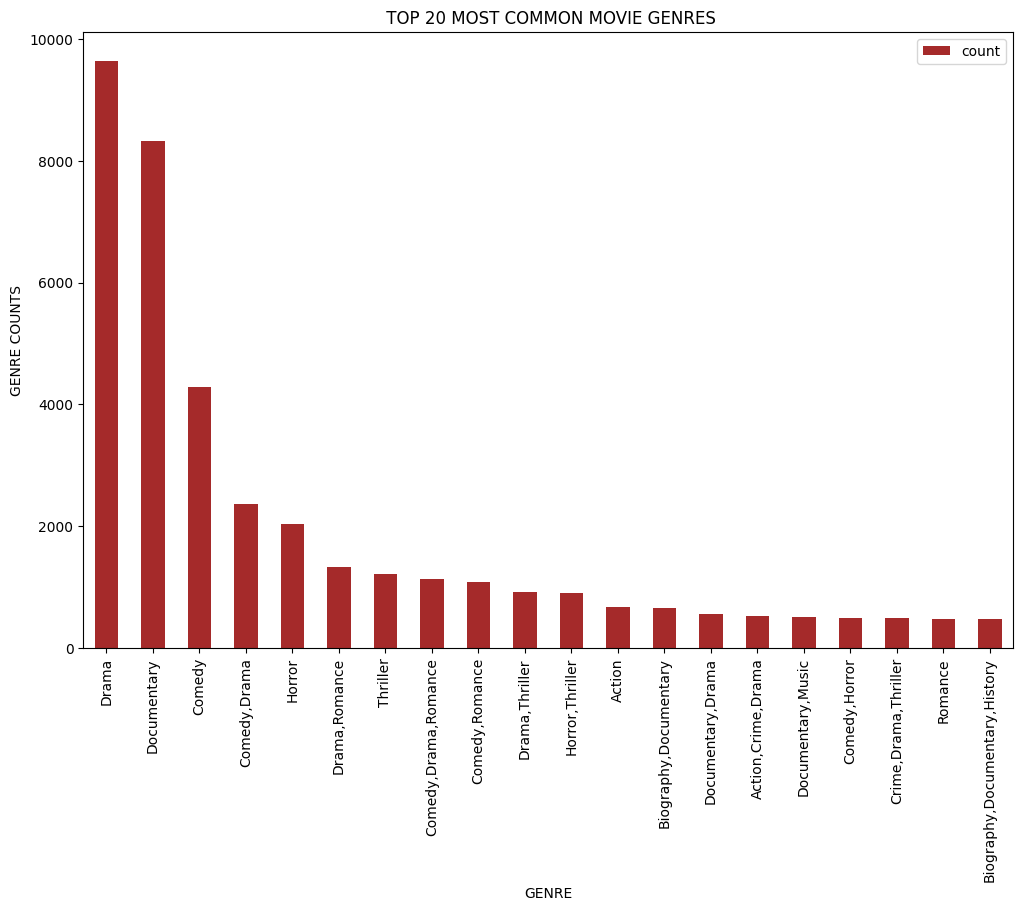

In [67]:
#getting the values counts of the most common genres
common_genres = imdb['genres'].value_counts().head(20)
common_genres.columns = ['genres', 'Counts']
#plotting
plt.figure(figsize=(12,8))
common_genres.plot(kind='bar', x='genres', y='Counts', figsize=(12,8), legend=True,color='brown')
plt.title(' TOP 20 MOST COMMON MOVIE GENRES')
plt.xlabel('GENRE')
plt.ylabel('GENRE COUNTS')


plt.show()

Bar graph showing the best performing type of genres.


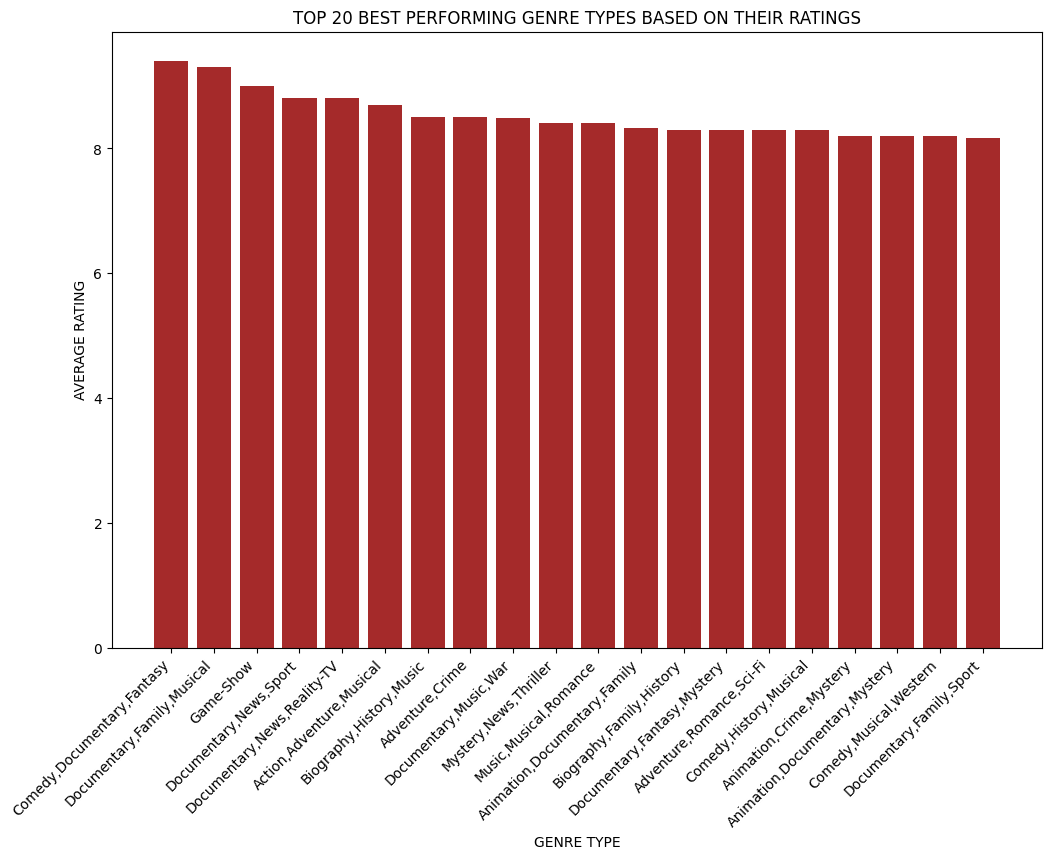

In [68]:
#Highest_rating1 = imdb.sort_values(by = 'averagerating', ascending = False)
Highest_rating2 = imdb.groupby('genres')['averagerating'].mean().reset_index()
Highest_rating2 = Highest_rating2.sort_values(by = 'averagerating',ascending = False).head(20)

plt.figure(figsize=(12,8))
plt.bar(Highest_rating2['genres'], Highest_rating2['averagerating'],color='brown')

plt.title('TOP 20 BEST PERFORMING GENRE TYPES BASED ON THEIR RATINGS')
plt.xlabel('GENRE TYPE')
plt.ylabel('AVERAGE RATING')
plt.xticks(rotation = 45, ha='right')

plt.show()

SCATTER PLOT OF RUNTIME AGAINST THE RATING

The scatter plot aims at finding out if the ratings of the movies is in any way connected to the rating of the movie. In the scatter plot below I used the highest rated movies (Top 3000) to try and find out if it has any effect.

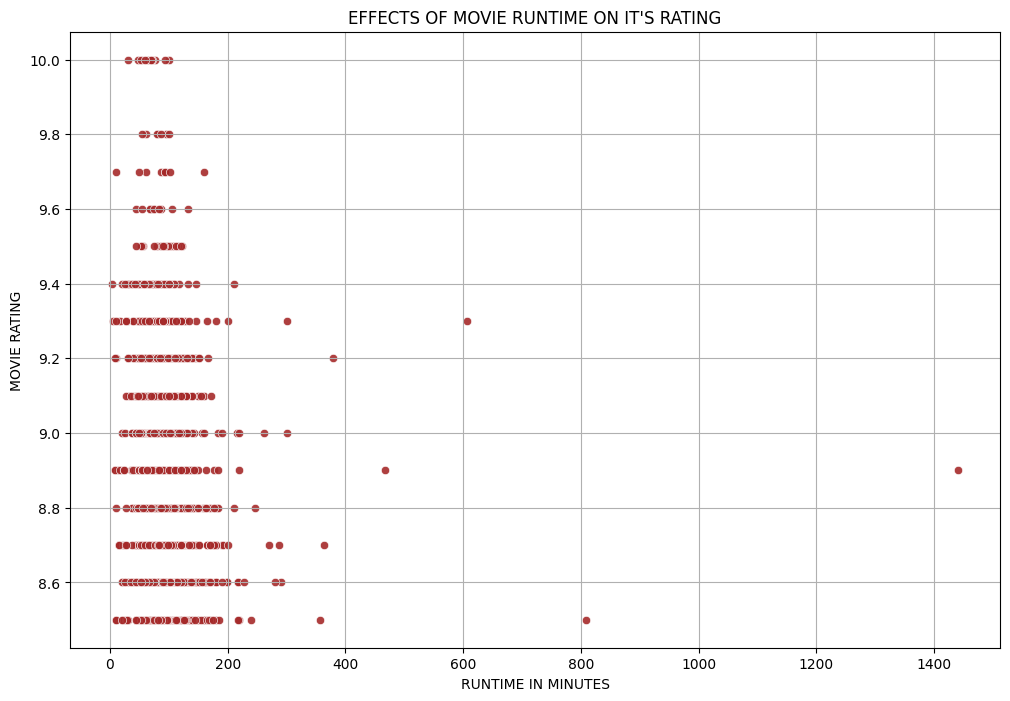

In [69]:
#sorting values by the highest rated
Highest_rating = imdb.sort_values(by = 'averagerating', ascending = False).head(3000)

#plottting
plt.figure(figsize=(12,8))
sns.scatterplot(data=Highest_rating, x='runtime_minutes', y='averagerating', alpha=0.9,color= 'brown')

plt.title("EFFECTS OF MOVIE RUNTIME ON IT'S RATING")
plt.xlabel("RUNTIME IN MINUTES")
plt.ylabel("MOVIE RATING")
plt.grid(True)

plt.show()

SCATTER PLOT OF RUNTIME AGAINST THE RATING

In the scatter plot below I used the lowest rated movies to try and find out if it has any effect.

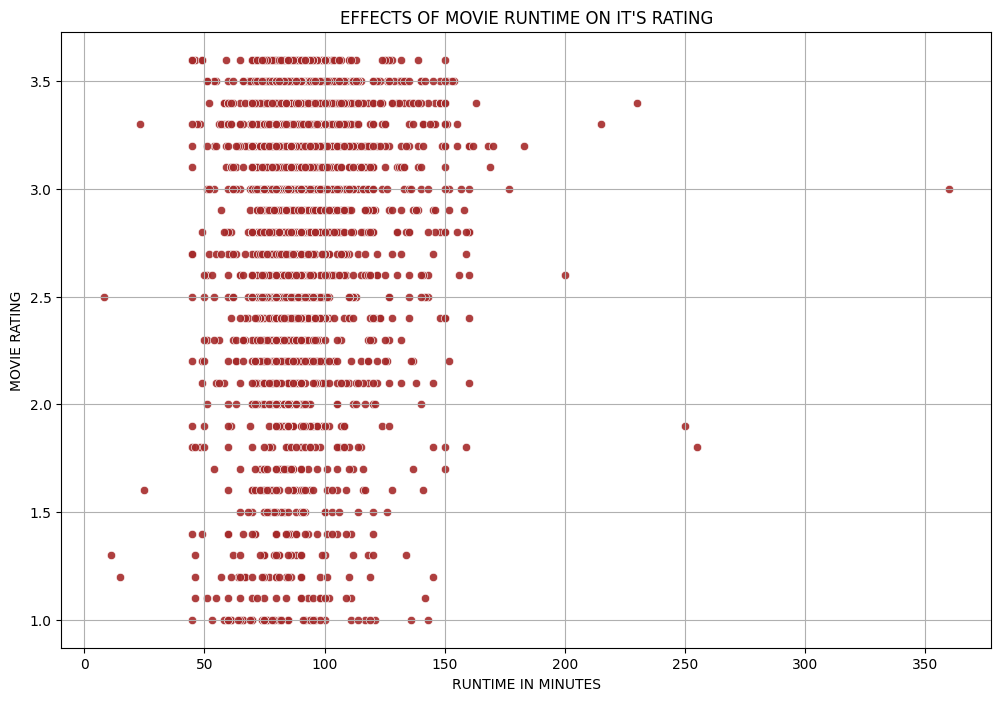

In [70]:
Lowest_rating = imdb.sort_values(by = 'averagerating').head(3000)
plt.figure(figsize=(12,8))
sns.scatterplot(data=Lowest_rating, x='runtime_minutes', y='averagerating', alpha=0.9,color='brown')

plt.title("EFFECTS OF MOVIE RUNTIME ON IT'S RATING")
plt.xlabel("RUNTIME IN MINUTES")
plt.ylabel("MOVIE RATING")
plt.grid(True)

plt.show()

# **RECOMMENDATIONS**



 Film types with a lower runtime going upto 150 minutes have a lower average rating. This means that they don't meet user preferences, my recommendatiion is to produce film types with upto 200 minutes of runtime.
 When considering the film type genre type should be put into consideration hence through my findings the company should focus on the genre's with a good average rating. Some of this genres include


*   Adventure,Biography,Documentary
*   Adventure,Comedy

*   Adventure,Documentary
*   Animation,Documentary,Family

*   Biography
*   Biography,Documentary,Drama

The type of films the company should highly consider are those that have a global influence as the global market generates more gross.